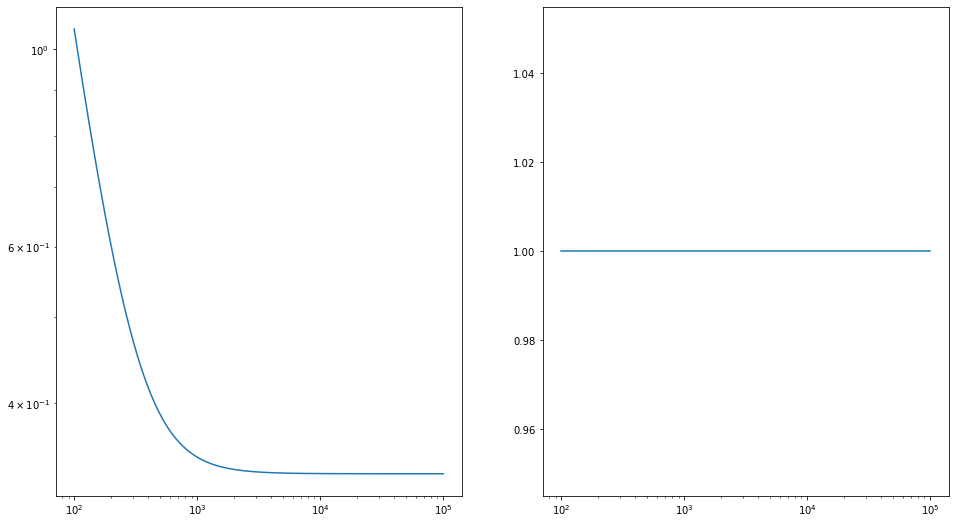

In [1]:
from Ultimate_Libraries import *

RecoilType = "ER"
nsig = 7
npts = 1000

epsilon =3
Quenching = "EDW"
sigma_phonon = 100

F = 1

def resolutionVSer(Er):
    Er = np.array(Er,dtype=float)
    Q = Ionization_Yield(Er,recoiltype=RecoilType,energyscale="eV",Quenching=Quenching)
    sigma_baseline2 = np.power(np.ones_like(Er)*sigma_phonon,2)
    sigma_Fano2 = np.power(F*Er*Q/epsilon,2)
    sigma_pct2 = np.power(1e-2 * Er,2)
    sigma_reso = np.sqrt(sigma_baseline2+sigma_Fano2+sigma_pct2) 
    return sigma_reso

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,9))
x = np.logspace(2,5,1000)
ax1.loglog(x,resolutionVSer(x)/x)
ax2.plot(x,Ionization_Yield(x,recoiltype=RecoilType,energyscale="eV",Quenching=Quenching))
ax2.set_xscale('log')

Detailed information about Experiment
Voltage =  3 V
Sigma =  400 eV
Sigmapercent =  0 %   pas encore utilisé
Fano =  1
IonModel =  CDMS  options are [CDMS,Rouven]
Target =  Ge options are [Ge,Si]
Epsilon =  3
Gap =  0.67
Exposure =  1  kg.days
Quenching =  EDW  options are [EDW,Lindhard_pure,Lindhard_corrected]
Target_uma =  72.64 uma
yes you are in
(1000,)
(1000,)
200.0


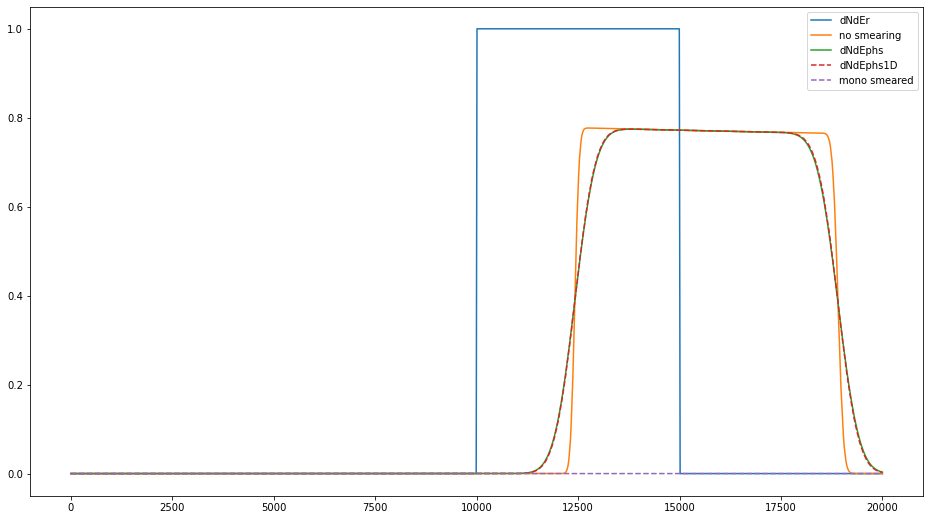

In [3]:


Exp = Experiment()
Exp.Voltage = 3
Exp.SigmaeV = 400
Exp.Exposure = 1
Exp.Fano = 1
Exp.TriggerNsigma = 3
Exp.IonModel = 'CDMS'
Exp.Quenching = "EDW"
Exp.Information()

Compton = Spectrum("NR",Exp)
Energyscale = 'eV'
ermin,ermax = 10000,15000
Compton.SetFunc(lambda x: np.ones_like(x)*1*(x>=ermin)*(x<=ermax),0,1e9)
dNdEr = Compton.GetFunc()
dNdEph = Compton.GetEphononFunc(Energyscale)
dNdEphs = Compton.GetEphononSmearedFunc(Energyscale,quantized=True)
dNdEphs1D = Compton.GetEphononSmearedFunc(Energyscale,quantized=False)


Monoline = Spectrum("monoER",Exp)
Monoline.SetLine(20,10)
MonolineEnergySpectrum1D = Monoline.GetEphononSmearedLine(Energyscale,quantized=False)

fig, ax = plt.subplots(figsize=(16,9))
x = np.linspace(0,20000,1000)


plt.plot(x,dNdEr(x),label='dNdEr')

notsmeared = dNdEph(x)
plt.plot(x,notsmeared,label='no smearing')

ys = dNdEphs(x)
plt.plot(x,ys,label='dNdEphs')
y1d = dNdEphs1D(x)
plt.plot(x,y1d,'--',label='dNdEphs1D')
plt.plot(x,MonolineEnergySpectrum1D(x),'--',label='mono smeared')
plt.legend()
print(y1d.shape)
print(ys.shape)
print(Exp.SigmaeVee)